In [1]:
import pandas as pd
import numpy as np

In [2]:
# Open the file and read the lines into a list
with open('positive.txt', 'r') as file:
    lines = file.readlines()

# Convert the list to a DataFrame
pos_df = pd.DataFrame(lines, columns=['Text'])

print(pos_df)

                                                   Text
0     the rock is destined to be the 21st century's ...
1     the gorgeously elaborate continuation of " the...
2                      effective but too-tepid biopic\n
3     if you sometimes like to go to the movies to h...
4     emerges as something rare , an issue movie tha...
...                                                 ...
5326  both exuberantly romantic and serenely melanch...
5327  mazel tov to a film about a family's joyous li...
5328  standing in the shadows of motown is the best ...
5329  it's nice to see piscopo again after all these...
5330  provides a porthole into that noble , tremblin...

[5331 rows x 1 columns]


In [3]:
with open('negative.txt','r') as file:
    lines = file.readlines()
neg_df = pd.DataFrame(lines, columns=['Text'])
print(neg_df)

                                                   Text
0                   simplistic , silly and tedious . \n
1     it's so laddish and juvenile , only teenage bo...
2     exploitative and largely devoid of the depth o...
3     [garbus] discards the potential for pathologic...
4     a visually flashy but narratively opaque and e...
...                                                 ...
5326  a terrible movie that some people will neverth...
5327  there are many definitions of 'time waster' bu...
5328  as it stands , crocodile hunter has the hurrie...
5329  the thing looks like a made-for-home-video qui...
5330  enigma is well-made , but it's just too dry an...

[5331 rows x 1 columns]


In [4]:
pos_df['sentiment'] = 1
neg_df['sentiment'] = 0

In [5]:
pos_df

,Text,sentiment
0,the rock is destined to be the 21st century's ...,1
1,"the gorgeously elaborate continuation of "" the...",1
2,effective but too-tepid biopic\n,1
3,if you sometimes like to go to the movies to h...,1
4,"emerges as something rare , an issue movie tha...",1
...,...,...
5326,both exuberantly romantic and serenely melanch...,1
5327,mazel tov to a film about a family's joyous li...,1
5328,standing in the shadows of motown is the best ...,1
5329,it's nice to see piscopo again after all these...,1


In [6]:
import pandas as pd

# Assuming pos_df and neg_df are already defined and include a 'sentiment' column

# Create the training set
train_pos_df = pos_df.iloc[:4000]
train_neg_df = neg_df.iloc[:4000]

# Create the validation set
val_pos_df = pos_df.iloc[4000:4500]
val_neg_df = neg_df.iloc[4000:4500]

# Create the test set
test_pos_df = pos_df.iloc[4500:5331]
test_neg_df = neg_df.iloc[4500:5331]

# Combine the positive and negative examples for each set
train_df = pd.concat([train_pos_df, train_neg_df], ignore_index=True)
val_df = pd.concat([val_pos_df, val_neg_df], ignore_index=True)
test_df = pd.concat([test_pos_df, test_neg_df], ignore_index=True)

# Randomize the rows in each dataset
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the shapes of the datasets to verify
print("Training set shape:", train_df.shape)
print("Validation set shape:", val_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (8000, 2)
Validation set shape: (1000, 2)
Test set shape: (1662, 2)


In [7]:
train_df

,Text,sentiment
0,"like a veteran head cutter , barbershop is tun...",1
1,"not a bad choice here , assuming that . . . th...",1
2,it makes you believe the cast and crew thoroug...,1
3,"'barbershop "" is a good-hearted ensemble comed...",1
4,as an entertainment destination for the genera...,0
...,...,...
7995,'synthetic' is the best description of this we...,0
7996,too intensely focused on the travails of being...,0
7997,"an elegant , exquisitely modulated psychologic...",1
7998,it's not helpful to listen to extremist name-c...,0


In [8]:
print(val_df.isnull().sum())
print(train_df.isnull().sum())
print(test_df.isnull().sum())

Text         0
sentiment    0
dtype: int64
Text         0
sentiment    0
dtype: int64
Text         0
sentiment    0
dtype: int64


In [9]:
print(val_df.duplicated().sum())
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0
0


In [10]:
import re
import string
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub('\s+', ' ', text).strip()
    return text

In [11]:
train_df['Text'] = train_df['Text'].apply(preprocess_text)
train_df['Text']

0       like a veteran head cutter barbershop is tuned...
1       not a bad choice here assuming that the aircon...
2       it makes you believe the cast and crew thoroug...
3       barbershop is a goodhearted ensemble comedy wi...
4       as an entertainment destination for the genera...
                              ...                        
7995    synthetic is the best description of this well...
7996    too intensely focused on the travails of being...
7997    an elegant exquisitely modulated psychological...
7998    its not helpful to listen to extremist namecal...
7999    as it stands theres some fine sex onscreen and...
Name: Text, Length: 8000, dtype: object

In [12]:
val_df['Text'] = val_df['Text'].apply(preprocess_text)
val_df['Text']

0      plays like a bad blend of an overripe episode ...
1      this movie is about the worst thing chan has d...
2      an incredibly irritating comedy about thorough...
3      dong never pushes for insights beyond the supe...
4      its compelling mix of trial movie escape movie...
                             ...                        
995    consummate actor barry has done excellent work...
996    so beautifully acted and directed its clear th...
997    the film was produced by jerry bruckheimer and...
998    jones has delivered a solidly entertaining and...
999    in questioning the election process payami gra...
Name: Text, Length: 1000, dtype: object

In [13]:
test_df['Text'] = test_df['Text'].apply(preprocess_text)
test_df['Text']

0       when science fiction takes advantage of the fa...
1       the hypnotic imagery and fragmentary tale expl...
2       even if youve never heard of chaplin youll sti...
3       this 90minute dud could pass for mike tysons e...
4       a fairly disposable yet still entertaining b p...
                              ...                        
1657    a film that will probably please people alread...
1658    while this one gets off with a good natured wa...
1659    mr wollter and ms seldhal give strong and conv...
1660    has none of the crackle of fatal attraction 9 ...
1661    if you are into splatter movies then you will ...
Name: Text, Length: 1662, dtype: object

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ambhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# Define a function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)

In [17]:
test_df_tokens = test_df.copy()
test_df_tokens['Text'] = test_df['Text'].apply(tokenize_text)
test_df_tokens['Text']

0       [when, science, fiction, takes, advantage, of,...
1       [the, hypnotic, imagery, and, fragmentary, tal...
2       [even, if, youve, never, heard, of, chaplin, y...
3       [this, 90minute, dud, could, pass, for, mike, ...
4       [a, fairly, disposable, yet, still, entertaini...
                              ...                        
1657    [a, film, that, will, probably, please, people...
1658    [while, this, one, gets, off, with, a, good, n...
1659    [mr, wollter, and, ms, seldhal, give, strong, ...
1660    [has, none, of, the, crackle, of, fatal, attra...
1661    [if, you, are, into, splatter, movies, then, y...
Name: Text, Length: 1662, dtype: object

In [18]:
train_df_tokens = train_df.copy()
train_df_tokens['Text'] = train_df['Text'].apply(tokenize_text)
train_df_tokens['Text']

0       [like, a, veteran, head, cutter, barbershop, i...
1       [not, a, bad, choice, here, assuming, that, th...
2       [it, makes, you, believe, the, cast, and, crew...
3       [barbershop, is, a, goodhearted, ensemble, com...
4       [as, an, entertainment, destination, for, the,...
                              ...                        
7995    [synthetic, is, the, best, description, of, th...
7996    [too, intensely, focused, on, the, travails, o...
7997    [an, elegant, exquisitely, modulated, psycholo...
7998    [its, not, helpful, to, listen, to, extremist,...
7999    [as, it, stands, theres, some, fine, sex, onsc...
Name: Text, Length: 8000, dtype: object

In [19]:
val_df_tokens = val_df.copy()
val_df_tokens['Text'] = val_df['Text'].apply(tokenize_text)
val_df_tokens['Text']

0      [plays, like, a, bad, blend, of, an, overripe,...
1      [this, movie, is, about, the, worst, thing, ch...
2      [an, incredibly, irritating, comedy, about, th...
3      [dong, never, pushes, for, insights, beyond, t...
4      [its, compelling, mix, of, trial, movie, escap...
                             ...                        
995    [consummate, actor, barry, has, done, excellen...
996    [so, beautifully, acted, and, directed, its, c...
997    [the, film, was, produced, by, jerry, bruckhei...
998    [jones, has, delivered, a, solidly, entertaini...
999    [in, questioning, the, election, process, paya...
Name: Text, Length: 1000, dtype: object

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ambhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
stop_words = set(stopwords.words('english'))

# Example DataFrame
# train_df = pd.DataFrame({'Text': [['This', 'is', 'a', 'sample', 'text'], ['Another', 'example', 'text']]})

def remove_stopwords(words):
    return [word for word in words if word.lower() not in stop_words]

In [22]:
train_df_tokens_stopwords_removed = train_df_tokens.copy()
train_df_tokens_stopwords_removed['Text'] = train_df_tokens_stopwords_removed['Text'].apply(remove_stopwords)

# Display the updated DataFrame
print(train_df_tokens_stopwords_removed)

                                                   Text  sentiment
0     [like, veteran, head, cutter, barbershop, tune...          1
1     [bad, choice, assuming, airconditioning, theat...          1
2     [makes, believe, cast, crew, thoroughly, enjoy...          1
3     [barbershop, goodhearted, ensemble, comedy, va...          1
4     [entertainment, destination, general, public, ...          0
...                                                 ...        ...
7995  [synthetic, best, description, wellmeaning, be...          0
7996  [intensely, focused, travails, hal, hartley, f...          0
7997  [elegant, exquisitely, modulated, psychologica...          1
7998  [helpful, listen, extremist, namecalling, rega...          0
7999  [stands, theres, fine, sex, onscreen, tense, a...          0

[8000 rows x 2 columns]


In [23]:
test_df_tokens_stopwords_removed = test_df_tokens.copy()
test_df_tokens_stopwords_removed['Text'] = test_df_tokens_stopwords_removed['Text'].apply(remove_stopwords)

# Display the updated DataFrame
print(test_df_tokens_stopwords_removed)

                                                   Text  sentiment
0     [science, fiction, takes, advantage, fact, int...          0
1     [hypnotic, imagery, fragmentary, tale, explore...          1
2     [even, youve, never, heard, chaplin, youll, st...          1
3     inute, dud, could, pass, mike, tysons, e, ...          0
4     [fairly, disposable, yet, still, entertaining,...          1
...                                                 ...        ...
1657  [film, probably, please, people, already, fasc...          0
1658  [one, gets, good, natured, warning, future, li...          0
1659  [mr, wollter, ms, seldhal, give, strong, convi...          0
1660  [none, crackle, fatal, attraction, 9, �, weeks...          0
1661  [splatter, movies, probably, reasonably, good,...          0

[1662 rows x 2 columns]


In [24]:
val_df_tokens_stopwords_removed = val_df_tokens.copy()
val_df_tokens_stopwords_removed['Text'] = val_df_tokens_stopwords_removed['Text'].apply(remove_stopwords)

# Display the updated DataFrame
print(val_df_tokens_stopwords_removed)

                                                  Text  sentiment
0    [plays, like, bad, blend, overripe, episode, t...          0
1    [movie, worst, thing, chan, done, united, states]          0
2    [incredibly, irritating, comedy, thoroughly, v...          0
3    [dong, never, pushes, insights, beyond, superf...          0
4    [compelling, mix, trial, movie, escape, movie,...          1
..                                                 ...        ...
995  [consummate, actor, barry, done, excellent, work]          1
996  [beautifully, acted, directed, clear, washingt...          1
997  [film, produced, jerry, bruckheimer, directed,...          0
998  [jones, delivered, solidly, entertaining, movi...          1
999  [questioning, election, process, payami, graph...          1

[1000 rows x 2 columns]


In [25]:
# lenArray = train_df_tokens_stopwords_removed['Text'].apply(len)
# lenArray.mean()

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

train_df_tokens_stopwords_removed['text_joined'] = train_df_tokens_stopwords_removed['Text'].apply(' '.join)
val_df_tokens_stopwords_removed['text_joined'] = val_df_tokens_stopwords_removed['Text'].apply(' '.join)
test_df_tokens_stopwords_removed['text_joined'] = test_df_tokens_stopwords_removed['Text'].apply(' '.join)

vectorizer = TfidfVectorizer(max_features=50000)
X_train = vectorizer.fit_transform(train_df_tokens_stopwords_removed['text_joined'])
X_val = vectorizer.transform(val_df_tokens_stopwords_removed['text_joined'])
X_test = vectorizer.transform(test_df_tokens_stopwords_removed['text_joined'])

# Get the target variables
y_train = train_df_tokens_stopwords_removed['sentiment']
y_val = val_df_tokens_stopwords_removed['sentiment']
y_test = test_df_tokens_stopwords_removed['sentiment']

In [27]:
X_train

<8000x17443 sparse matrix of type '<class 'numpy.float64'>'
	with 83821 stored elements in Compressed Sparse Row format>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support
import seaborn as sns
import matplotlib.pyplot as plt
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [29]:
# Step 4: Make predictions
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)


In [30]:
# Step 5: Evaluate the model
def evaluate_model(y_true, y_pred, set_name):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Precision, Recall, F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')
    
    # Print results
    print(f"\n--- {set_name} Set Metrics ---")
    print("Confusion Matrix:")
    print(cm)
    print(f"\nPrecision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()



--- Validation Set Metrics ---
Confusion Matrix:
[[396 104]
 [132 368]]

Precision: 0.7797
Recall: 0.7360
F1-score: 0.7572

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       500
           1       0.78      0.74      0.76       500

    accuracy                           0.76      1000
   macro avg       0.76      0.76      0.76      1000
weighted avg       0.76      0.76      0.76      1000



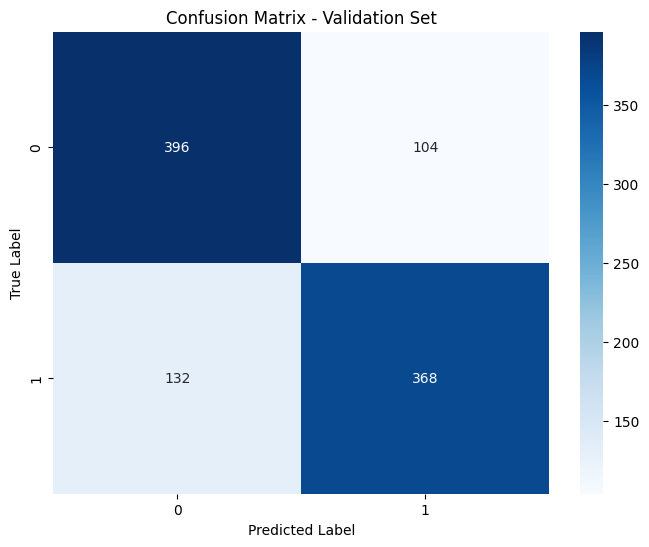


--- Test Set Metrics ---
Confusion Matrix:
[[645 186]
 [214 617]]

Precision: 0.7684
Recall: 0.7425
F1-score: 0.7552

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       831
           1       0.77      0.74      0.76       831

    accuracy                           0.76      1662
   macro avg       0.76      0.76      0.76      1662
weighted avg       0.76      0.76      0.76      1662



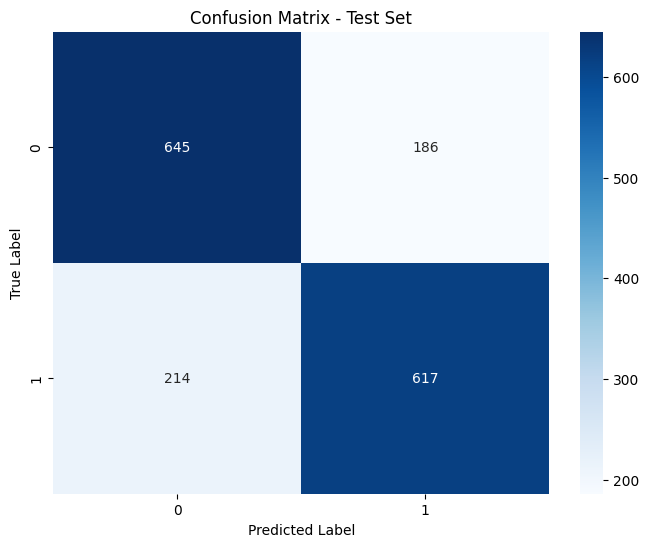

In [31]:
# Evaluate on validation set
evaluate_model(y_val, y_val_pred, "Validation")

# Evaluate on test set
evaluate_model(y_test, y_test_pred, "Test")

In [32]:
# Train the SVM model
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
def evaluate_model(model, X, y_true, set_name):
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Print results
    print(f"\n--- {set_name} Set Metrics ---")
    print("Confusion Matrix:")
    print(cm)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {set_name} Set')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
evaluate_model(svm_model, X_val, y_val, "Validation")

# Evaluate on test set
evaluate_model(svm_model, X_test, y_test, "Test")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [ ]:
# Prepare the data
X_train = train_df['Text'].values
y_train = train_df['sentiment'].values
X_val = val_df['Text'].values
y_val = val_df['sentiment'].values
X_test = test_df['Text'].values
y_test = test_df['sentiment'].values

In [ ]:
max_words = 50000
max_len = 12

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
model = Sequential([
    Embedding(max_words, 128),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val))

# Evaluate the model
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
X_train = train_df_tokens_stopwords_removed['text_joined'].values
y_train = train_df['sentiment'].values
X_val = val_df_tokens_stopwords_removed['text_joined'].values
y_val = val_df['sentiment'].values
X_test = test_df_tokens_stopwords_removed['text_joined'].values
y_test = test_df['sentiment'].values

In [ ]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:
history = model.fit(X_train_pad, y_train, batch_size=32, epochs=5, validation_data=(X_val_pad, y_val))

# Evaluate the model
y_pred = (model.predict(X_test_pad) > 0.5).astype(int)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report (includes precision, recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [28]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import time
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [ ]:
X_train = train_df['Text'].values
y_train = train_df['sentiment'].values
X_val = val_df['Text'].values
y_val = val_df['sentiment'].values
X_test = test_df['Text'].values
y_test = test_df['sentiment'].values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
max_len = 128

def encode_sequences(texts):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )


In [ ]:
train_encodings = encode_sequences(X_train)
val_encodings = encode_sequences(X_val)
test_encodings = encode_sequences(X_test)

In [ ]:
train_dataset = TensorDataset(
    train_encodings['input_ids'], 
    train_encodings['attention_mask'], 
    torch.tensor(y_train)
)
val_dataset = TensorDataset(
    val_encodings['input_ids'], 
    val_encodings['attention_mask'], 
    torch.tensor(y_val)
)
test_dataset = TensorDataset(
    test_encodings['input_ids'], 
    test_encodings['attention_mask'], 
    torch.tensor(y_test)
)

In [ ]:
batch_size = 32  # Adjust based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

In [31]:
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss()

AttributeError: 'LogisticRegression' object has no attribute 'parameters'

In [ ]:
epochs = 5
for epoch in range(epochs):
    model.train()
    start_time = time.time()
    total_loss = 0
    correct_predictions = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        total_loss += loss.item()
        
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        
        loss.backward()
        optimizer.step()
    
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions.double() / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")
    print(f"Epoch training time: {time.time() - start_time:.2f} seconds")

    # Validation loop
    model.eval()
    val_correct_predictions = 0
    val_total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)
            val_total_loss += loss.item()
            _, preds = torch.max(logits, dim=1)
            val_correct_predictions += torch.sum(preds == labels)
    
    val_accuracy = val_correct_predictions.double() / len(val_dataset)
    val_avg_loss = val_total_loss / len(val_loader)
    print(f"Validation - Loss: {val_avg_loss:.4f} - Accuracy: {val_accuracy:.4f}")


In [ ]:
model.eval()
test_correct_predictions = 0
all_preds = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        test_correct_predictions += torch.sum(preds == labels)

test_accuracy = test_correct_predictions.double() / len(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, all_preds)
print("Confusion Matrix:")
print(cm)

In [ ]:
X_train = train_df_tokens_stopwords_removed['text_joined'].values
y_train = train_df['sentiment'].values
X_val = val_df_tokens_stopwords_removed['text_joined'].values
y_val = val_df['sentiment'].values
X_test = test_df_tokens_stopwords_removed['text_joined'].values
y_test = test_df['sentiment'].values

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences
max_len = 128

def encode_sequences(texts):
    return tokenizer.batch_encode_plus(
        texts,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt'
    )


In [ ]:
train_encodings = encode_sequences(X_train)
val_encodings = encode_sequences(X_val)
test_encodings = encode_sequences(X_test)

In [ ]:
train_dataset = TensorDataset(
    train_encodings['input_ids'], 
    train_encodings['attention_mask'], 
    torch.tensor(y_train)
)
val_dataset = TensorDataset(
    val_encodings['input_ids'], 
    val_encodings['attention_mask'], 
    torch.tensor(y_val)
)
test_dataset = TensorDataset(
    test_encodings['input_ids'], 
    test_encodings['attention_mask'], 
    torch.tensor(y_test)
)

In [ ]:
batch_size = 32  # Adjust based on your GPU memory
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
epochs = 5
for epoch in range(epochs):
    model.train()
    start_time = time.time()
    total_loss = 0
    correct_predictions = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        loss = criterion(logits, labels)
        total_loss += loss.item()
        
        _, preds = torch.max(logits, dim=1)
        correct_predictions += torch.sum(preds == labels)
        
        loss.backward()
        optimizer.step()
    
    avg_loss = total_loss / len(train_loader)
    accuracy = correct_predictions.double() / len(train_dataset)
    print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {accuracy:.4f}")
    print(f"Epoch training time: {time.time() - start_time:.2f} seconds")

    # Validation loop
    model.eval()
    val_correct_predictions = 0
    val_total_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            loss = criterion(logits, labels)
            val_total_loss += loss.item()
            _, preds = torch.max(logits, dim=1)
            val_correct_predictions += torch.sum(preds == labels)
    
    val_accuracy = val_correct_predictions.double() / len(val_dataset)
    val_avg_loss = val_total_loss / len(val_loader)
    print(f"Validation - Loss: {val_avg_loss:.4f} - Accuracy: {val_accuracy:.4f}")

model.eval()
test_correct_predictions = 0
all_preds = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, preds = torch.max(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        test_correct_predictions += torch.sum(preds == labels)

test_accuracy = test_correct_predictions.double() / len(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, all_preds)
print("Confusion Matrix:")
print(cm)

In [29]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import DataLoader, TensorDataset

2024-09-03 15:52:04.150461: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-03 15:52:04.324550: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-03 15:52:04.943759: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [30]:
tokenizer = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english')
model = AutoModelForSequenceClassification.from_pretrained('siebert/sentiment-roberta-large-english')

In [31]:
from torch.optim import AdamW
def preprocess_data(texts, labels, max_len=128):
    inputs = tokenizer(texts.tolist(), max_length=max_len, padding=True, truncation=True, return_tensors='pt')
    labels = torch.tensor(labels.values)
    return TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)

# Prepare datasets
train_dataset = preprocess_data(train_df['Text'], train_df['sentiment'])
val_dataset = preprocess_data(val_df['Text'], val_df['sentiment'])
test_dataset = preprocess_data(test_df['Text'], test_df['sentiment'])

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16)
test_loader = DataLoader(test_dataset, batch_size=16)

optimizer = AdamW(model.parameters(), lr=2e-5)

In [32]:
class SimpleDataset(torch.utils.data.Dataset):
    def __init__(self, tokenized_texts, labels=None):
        self.tokenized_texts = tokenized_texts
        self.labels = labels
    
    def __len__(self):
        return len(self.tokenized_texts["input_ids"])
    
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.tokenized_texts.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

In [33]:
from torch.cuda.amp import GradScaler, autocast

# Initialize GradScaler
scaler = GradScaler()

# Set the model to training mode
model.train()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 1024, padding_idx=1)
      (position_embeddings): Embedding(514, 1024, padding_idx=1)
      (token_type_embeddings): Embedding(1, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-23): 24 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
 

In [34]:
import torch.nn.utils.prune as prune

# Prune the fully connected layers (or other layers you want to prune)
for name, module in model.named_modules():
    if isinstance(module, torch.nn.Linear):  # You can also target other layer types
        prune.l1_unstructured(module, name='weight', amount=0.2) 

In [35]:
for epoch in range(3):  # Replace with the number of epochs you want
    for batch in train_loader:
        # Unpack the batch into inputs, attention masks, and labels
        input_ids, attention_masks, labels = batch

        # Move inputs and labels to GPU
        input_ids = input_ids.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        # Prepare the input dictionary for the model
        inputs = {
            "input_ids": input_ids,
            "attention_mask": attention_masks
        }

        # Forward pass with autocast
        with autocast():
            outputs = model(**inputs)
            logits = outputs.logits
        
        # Calculate the loss manually if it's not included in the output
        loss = torch.nn.functional.cross_entropy(logits, labels)

        # Backward pass with scaled gradients
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        optimizer.zero_grad()

    print(f"Epoch {epoch + 1} completed")

# Set the model to evaluation mode
model.eval()


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 

In [37]:
# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=16,  # batch size for training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"      # Evaluate every epoch
)

# Create Trainer instance
trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset             # evaluation dataset
)

# Train the model
trainer.train()


/home/ambhi/.local/lib/python3.10/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 

In [40]:
import torch
import gc

torch.cuda.empty_cache()
gc.collect()

487

In [42]:
train_df

,Text,sentiment
0,like a veteran head cutter barbershop is tuned...,1
1,not a bad choice here assuming that the aircon...,1
2,it makes you believe the cast and crew thoroug...,1
3,barbershop is a goodhearted ensemble comedy wi...,1
4,as an entertainment destination for the genera...,0
...,...,...
7995,synthetic is the best description of this well...,0
7996,too intensely focused on the travails of being...,0
7997,an elegant exquisitely modulated psychological...,1
7998,its not helpful to listen to extremist namecal...,0
